In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix , classification_report
from imblearn.over_sampling import SMOTE


In [7]:
df = pd.read_excel('PCOS_data_without_infertility (1).xlsx', sheet_name='Full_new')

In [9]:
df.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1,1,0,28,44.6,152.0,19.300000,15,78,22,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,2,0,36,65.0,161.5,24.921163,15,74,20,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,3,1,33,68.8,165.0,25.270891,11,72,18,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,4,0,37,65.0,148.0,29.674945,13,72,20,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,5,0,25,52.0,161.0,20.060954,11,72,18,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN


In [13]:
#exploratory data analysis . check for the size of pcos dataset we are using shape it gives number of rows and columns 

In [19]:
df.shape

(541, 45)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

In [23]:
#checking for any null values using .isnull()

In [25]:
df.isnull().sum()

Sl. No                      0
Patient File No.            0
PCOS (Y/N)                  0
 Age (yrs)                  0
Weight (Kg)                 0
Height(Cm)                  0
BMI                         0
Blood Group                 0
Pulse rate(bpm)             0
RR (breaths/min)            0
Hb(g/dl)                    0
Cycle(R/I)                  0
Cycle length(days)          0
Marraige Status (Yrs)       1
Pregnant(Y/N)               0
No. of aborptions           0
  I   beta-HCG(mIU/mL)      0
II    beta-HCG(mIU/mL)      0
FSH(mIU/mL)                 0
LH(mIU/mL)                  0
FSH/LH                      0
Hip(inch)                   0
Waist(inch)                 0
Waist:Hip Ratio             0
TSH (mIU/L)                 0
AMH(ng/mL)                  0
PRL(ng/mL)                  0
Vit D3 (ng/mL)              0
PRG(ng/mL)                  0
RBS(mg/dl)                  0
Weight gain(Y/N)            0
hair growth(Y/N)            0
Skin darkening (Y/N)        0
Hair loss(

In [27]:
#Since, there are very neglible null values, we can drop them. Also, the column Unnamed has mostly missing values , its not useful for our analysis purpose.

In [29]:
df.dropna()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
180,181,181,1,30,70.0,150.0,31.111111,16,74,18,...,1.0,0,120,80,8,6,12.0,11.0,4.5,.
363,364,364,0,31,48.0,152.0,20.800000,17,72,18,...,1.0,0,110,80,1,3,13.0,13.0,7.0,7


In [31]:
df['II    beta-HCG(mIU/mL)'] = pd.to_numeric(df['II    beta-HCG(mIU/mL)'],errors='coerce')
df['AMH(ng/mL)'] = pd.to_numeric(df['AMH(ng/mL)'],errors='coerce')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

In [35]:
df.drop('Unnamed: 44',axis=1,inplace=True)

In [37]:
df.columns

Index(['Sl. No', 'Patient File No.', 'PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)',
       'Height(Cm) ', 'BMI', 'Blood Group', 'Pulse rate(bpm) ',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of aborptions',
       '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)',
       'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio',
       'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)',
       'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)'],
      dtype='object')

In [39]:
df.corr()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
Sl. No,1.000000,1.000000,0.060998,0.067133,-0.082823,-0.011700,-0.083578,0.001705,-0.044533,-0.015196,...,0.160834,0.154135,0.000110,0.013399,0.009798,0.049658,0.086969,0.289706,0.244608,0.027219
Patient File No.,1.000000,1.000000,0.060998,0.067133,-0.082823,-0.011700,-0.083578,0.001705,-0.044533,-0.015196,...,0.160834,0.154135,0.000110,0.013399,0.009798,0.049658,0.086969,0.289706,0.244608,0.027219
PCOS (Y/N),0.060998,0.060998,1.000000,-0.168513,0.211938,0.068254,0.199534,0.036433,0.091821,0.036928,...,0.286077,0.377933,0.065337,0.007942,0.038032,0.603346,0.648327,0.132992,0.097690,0.106648
Age (yrs),0.067133,0.067133,-0.168513,1.000000,-0.029734,-0.119819,0.021261,-0.010954,0.045831,0.087382,...,-0.032921,-0.037694,-0.025911,0.073587,0.066788,-0.110793,-0.159395,-0.016352,-0.079250,-0.104238
Weight (Kg),-0.082823,-0.082823,0.211938,-0.029734,1.000000,0.420098,0.901675,0.072682,0.019983,0.043614,...,0.063983,0.162015,-0.068236,0.027608,0.131402,0.173751,0.124290,-0.021368,-0.073207,-0.010100
Height(Cm),-0.011700,-0.011700,0.068254,-0.119819,0.420098,1.000000,-0.006878,0.040825,-0.074339,-0.029459,...,0.061129,0.032418,0.012943,-0.067959,0.011116,0.106189,0.075358,-0.026705,0.059426,-0.054035
BMI,-0.083578,-0.083578,0.199534,0.021261,0.901675,-0.006878,1.000000,0.061939,0.050529,0.061905,...,0.045656,0.159279,-0.080192,0.069491,0.139975,0.142886,0.104204,-0.011610,-0.111522,0.009349
Blood Group,0.001705,0.001705,0.036433,-0.010954,0.072682,0.040825,0.061939,1.000000,0.047572,-0.023766,...,0.039029,-0.035090,0.064035,0.030898,0.054014,0.061332,0.013974,-0.035667,-0.015725,-0.015335
Pulse rate(bpm),-0.044533,-0.044533,0.091821,0.045831,0.019983,-0.074339,0.050529,0.047572,1.000000,0.303804,...,-0.003039,0.059804,-0.038881,-0.025510,0.007623,0.040390,0.049182,-0.048356,-0.034202,-0.041241
RR (breaths/min),-0.015196,-0.015196,0.036928,0.087382,0.043614,-0.029459,0.061905,-0.023766,0.303804,1.000000,...,0.029242,0.135479,-0.047451,0.017323,0.052631,0.069731,0.012441,-0.031051,-0.021893,-0.063930


In [41]:
correlation_with_target = df.corr()['PCOS (Y/N)'].abs().sort_values(ascending=False)
print(correlation_with_target)

PCOS (Y/N)                1.000000
Follicle No. (R)          0.648327
Follicle No. (L)          0.603346
Skin darkening (Y/N)      0.475733
hair growth(Y/N)          0.464667
Weight gain(Y/N)          0.441047
Cycle(R/I)                0.401644
Fast food (Y/N)           0.377933
Pimples(Y/N)              0.286077
AMH(ng/mL)                0.263863
Weight (Kg)               0.211938
BMI                       0.199534
Cycle length(days)        0.178480
Hair loss(Y/N)            0.172879
 Age (yrs)                0.168513
Waist(inch)               0.164598
Hip(inch)                 0.162297
Avg. F size (L) (mm)      0.132992
Marraige Status (Yrs)     0.112897
Endometrium (mm)          0.106648
Avg. F size (R) (mm)      0.097690
Pulse rate(bpm)           0.091821
Hb(g/dl)                  0.087170
Vit D3 (ng/mL)            0.085494
Height(Cm)                0.068254
Reg.Exercise(Y/N)         0.065337
LH(mIU/mL)                0.063879
Sl. No                    0.060998
Patient File No.    

In [43]:
#1. Distribution of PCOS Cases Across Age Groups


In [45]:
# Define age group bins and labels
age_groups = [0,18,25,35,45,float('inf')]
age_labels = ['<18','18-25','26-35','36-45','45+']
df['Age Group'] = pd.cut(df[' Age (yrs)'],bins = age_groups,labels = age_labels)

In [47]:
# Categorize the 'Age (yrs)' column into age groups
age_group_counts = df.groupby(['Age Group', 'PCOS (Y/N)']).size().unstack()
type(age_group_counts)

C:\Users\gungu\AppData\Local\Temp\ipykernel_4544\1467622942.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_counts = df.groupby(['Age Group', 'PCOS (Y/N)']).size().unstack()


pandas.core.frame.DataFrame

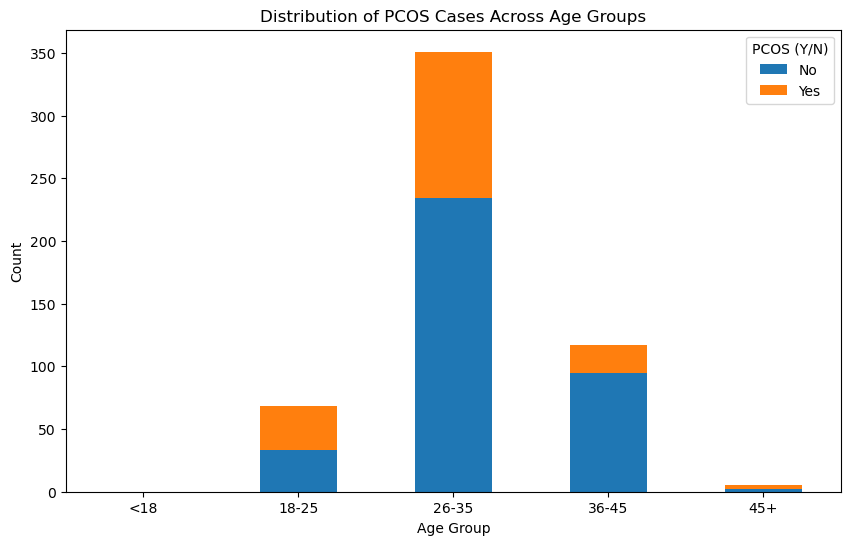

In [49]:
age_group_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribution of PCOS Cases Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='PCOS (Y/N)', loc='upper right', labels=['No', 'Yes'])
plt.xticks(rotation=0)
plt.show()

In [51]:
#It can be observed from above plot that PCOS affects mainly the age group of 26-35 and 18-15.

In [53]:
#2. Distribution analysis for numerical attributes

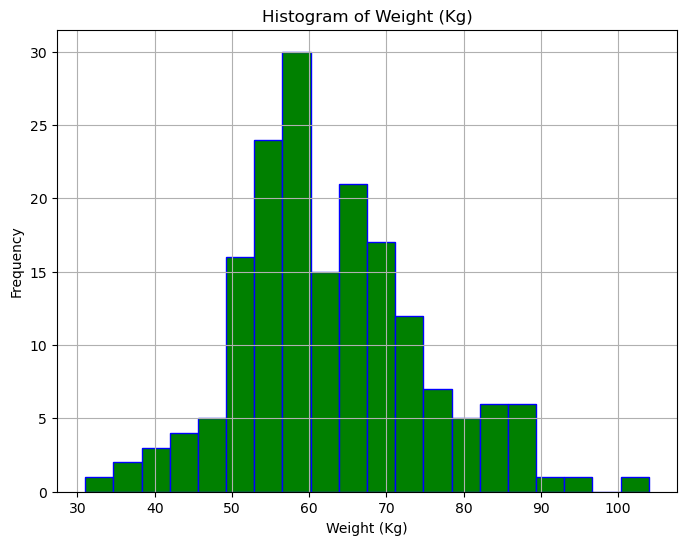

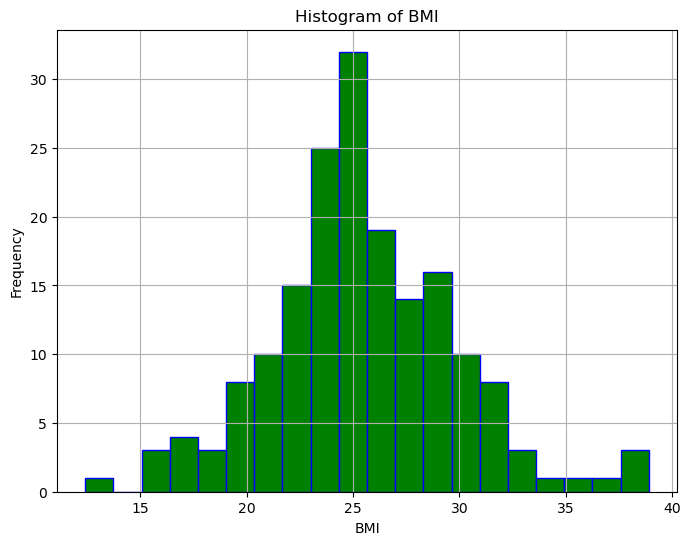

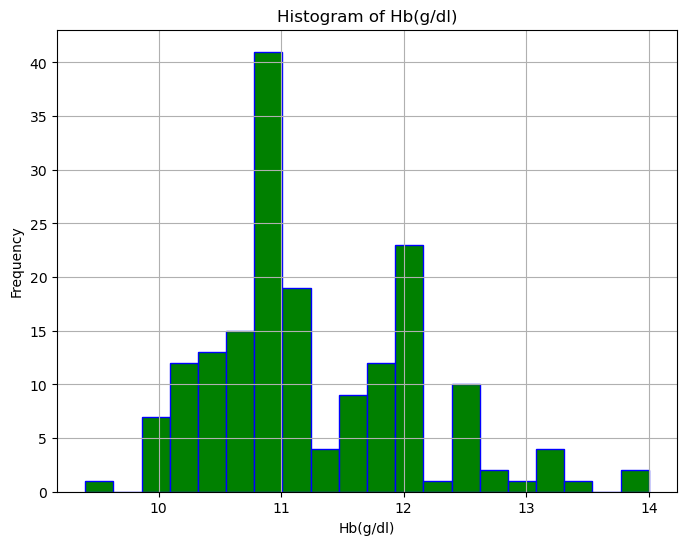

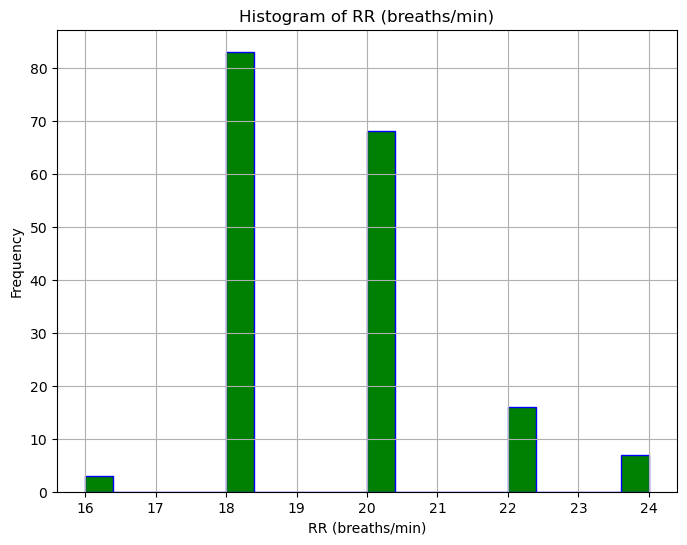

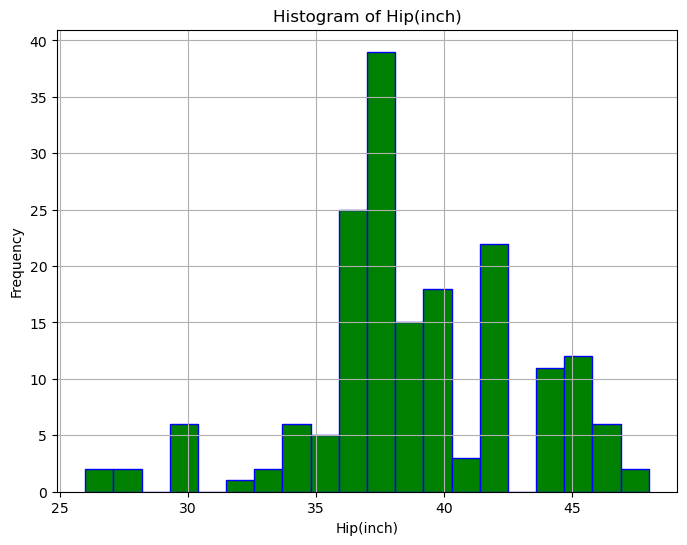

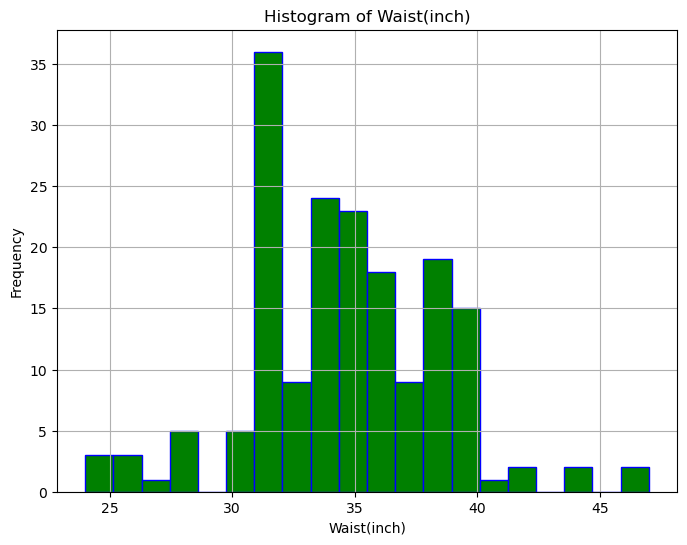

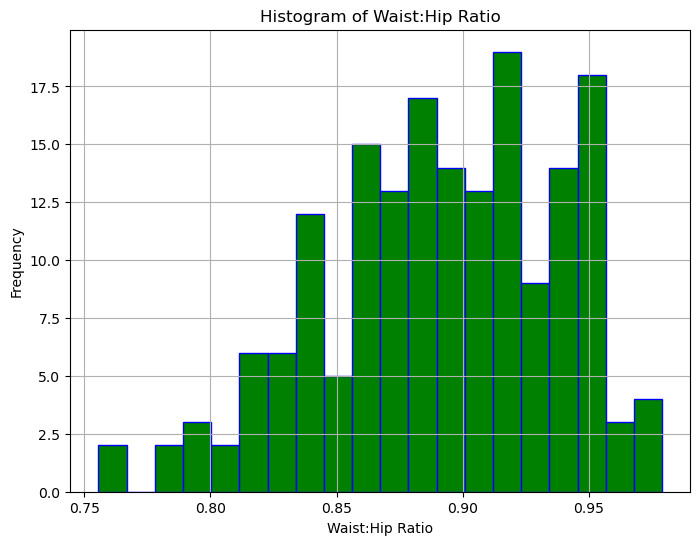

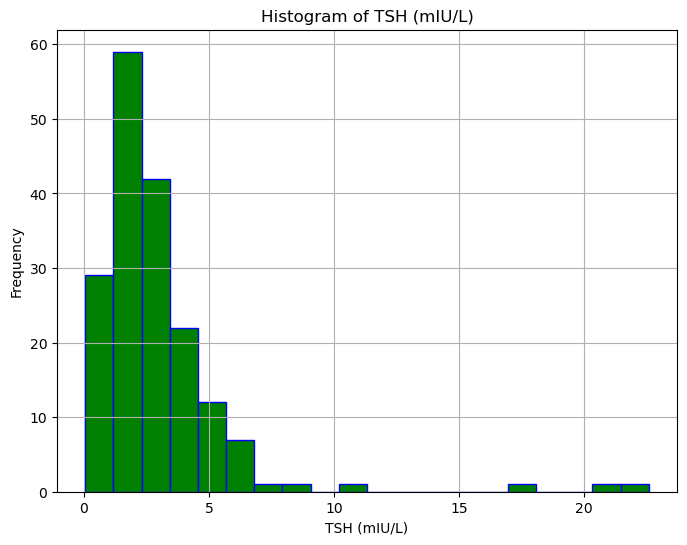

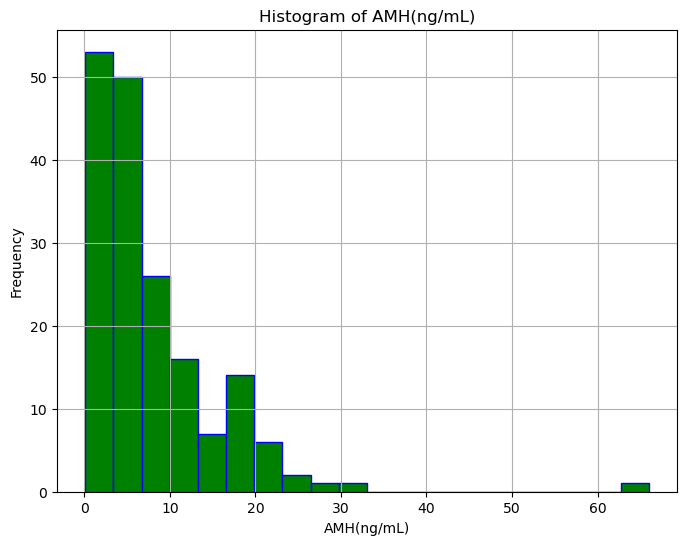

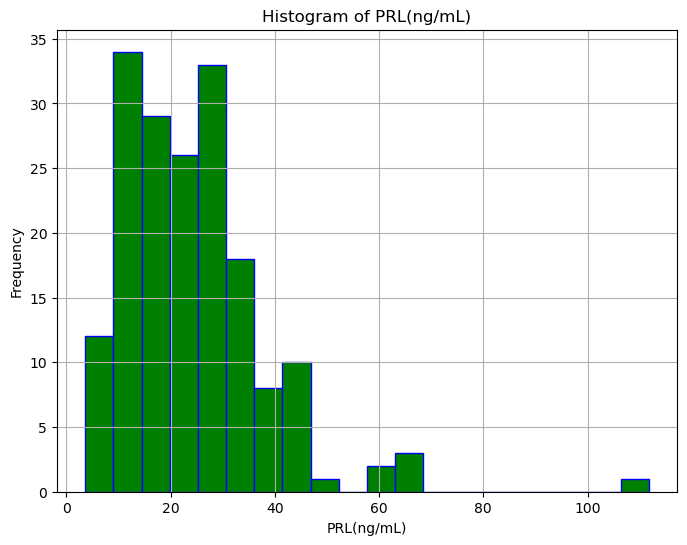

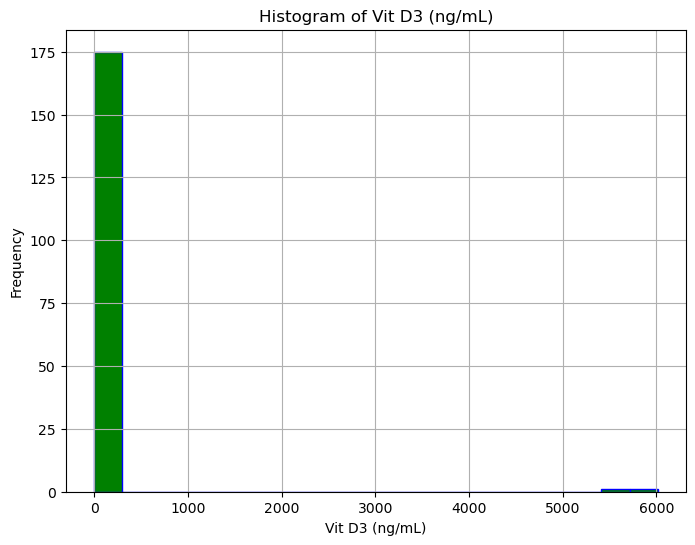

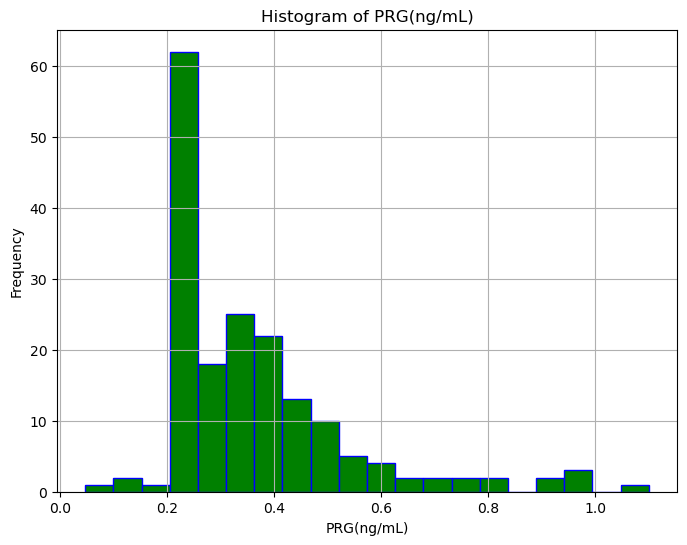

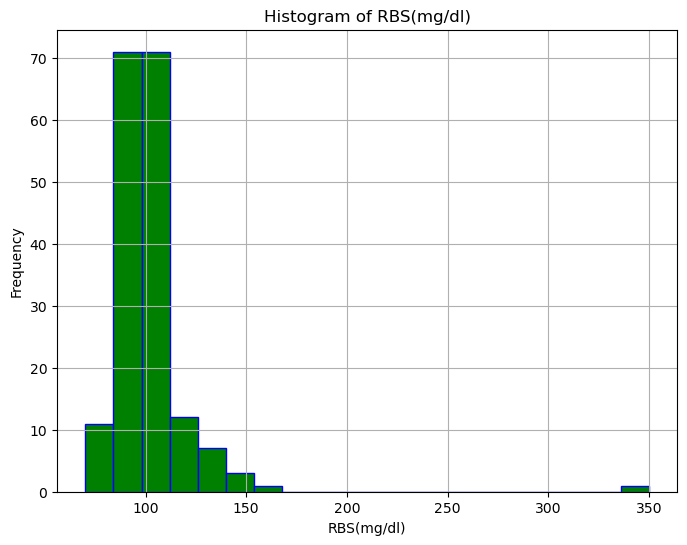

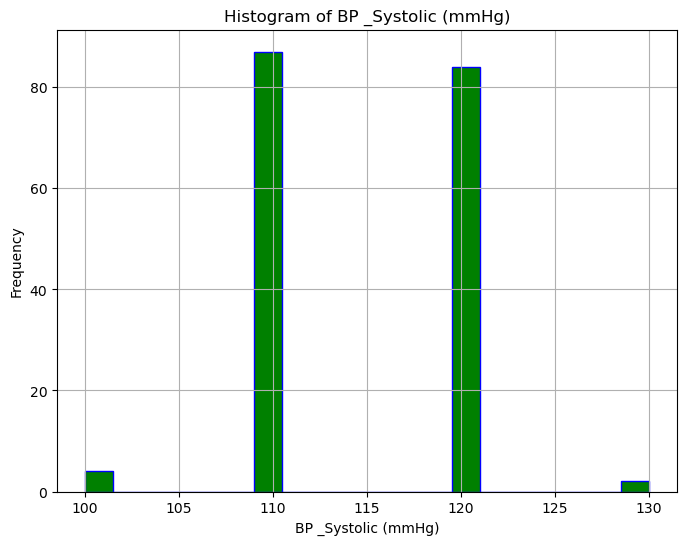

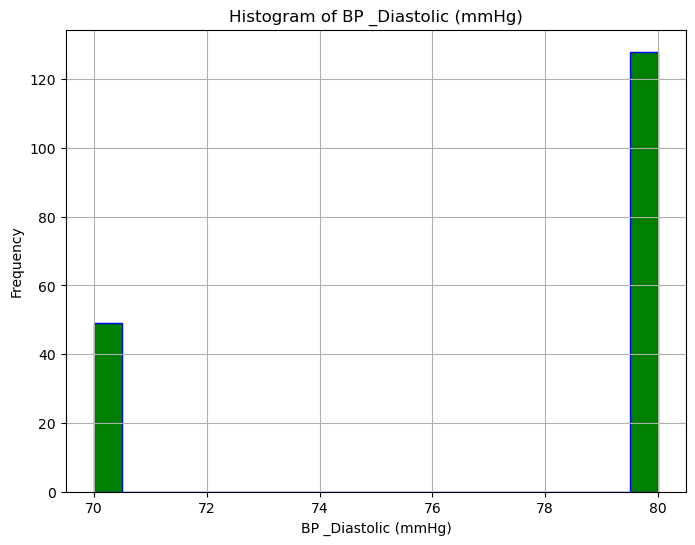

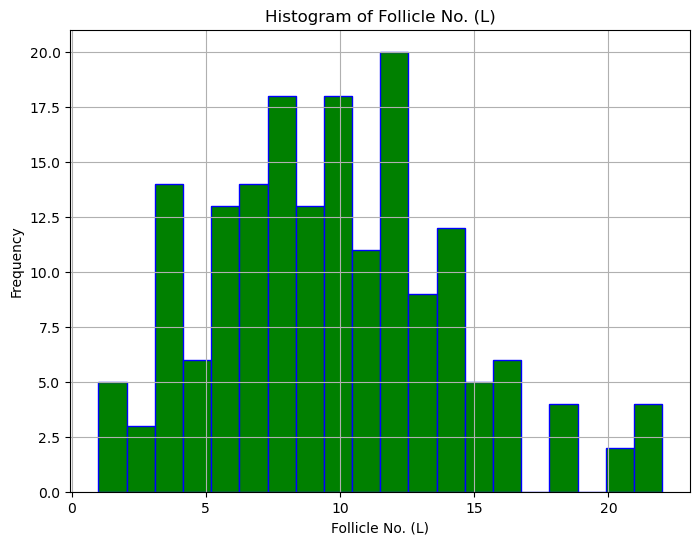

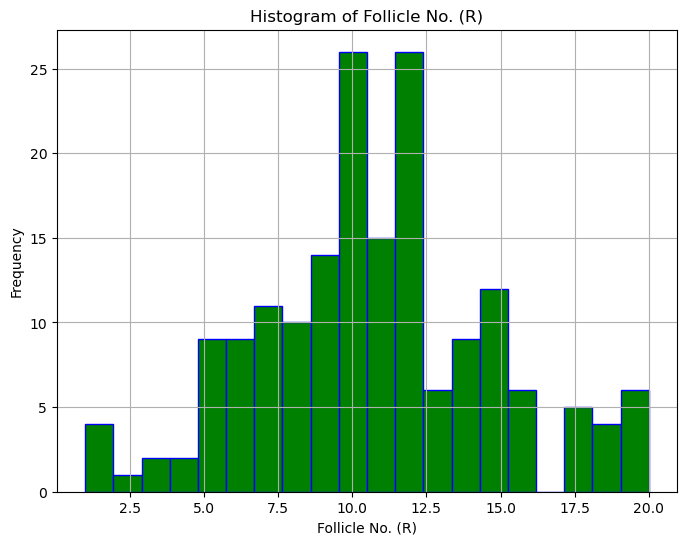

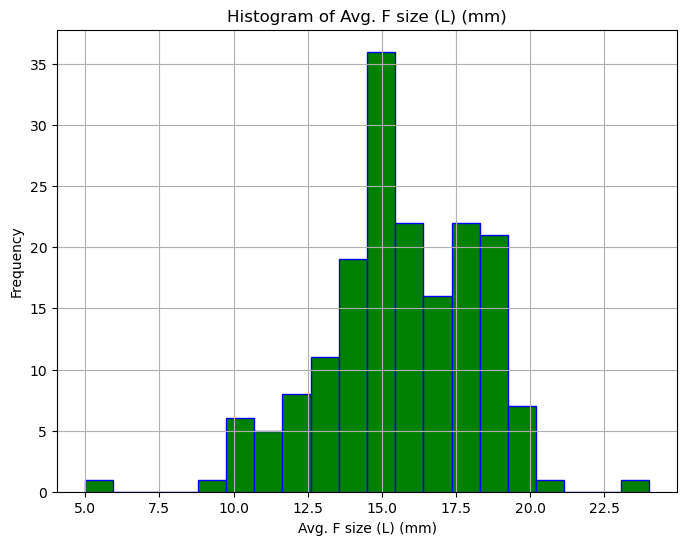

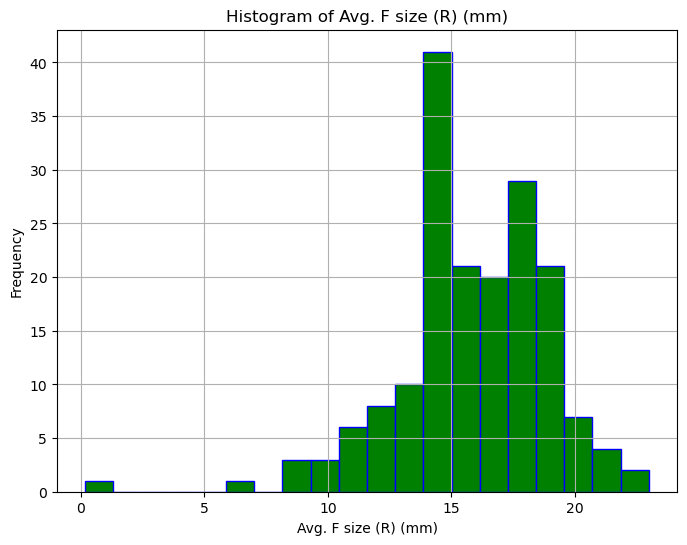

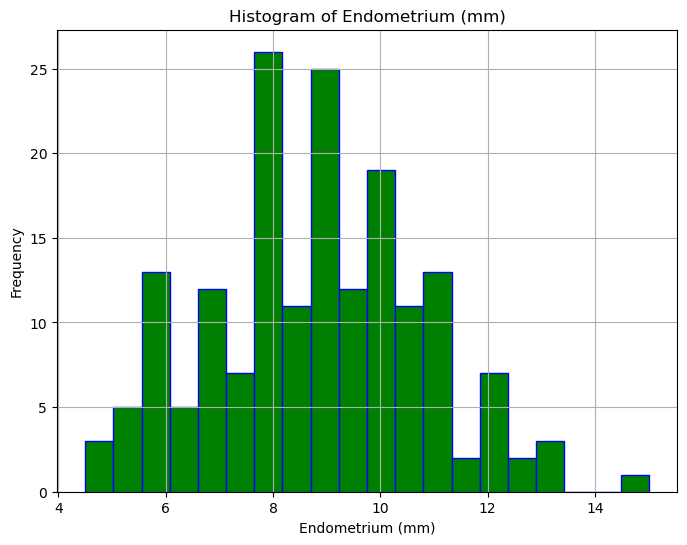

In [55]:
# List of numerical attributes for distribution analysis
numerical_attributes = ['Weight (Kg)', 'BMI', 'Hb(g/dl)','RR (breaths/min)',
                        'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio', 'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)',
                        'Vit D3 (ng/mL)', 'PRG(ng/mL)', 'RBS(mg/dl)', 'BP _Systolic (mmHg)', 'BP _Diastolic (mmHg)',
                        'Follicle No. (L)', 'Follicle No. (R)', 'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)',
                        'Endometrium (mm)']
df_pcos = df[df['PCOS (Y/N)']==1]
# Create histograms for each numerical attribute
for attribute in numerical_attributes:
    plt.figure(figsize=(8, 6))
    plt.hist(df_pcos[attribute], bins=20, color='green', edgecolor='blue')
    plt.title(f'Histogram of {attribute}')
    plt.xlabel(attribute)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

In [57]:
#2. Feature Selection

In [59]:
top_10_features = correlation_with_target[0:11]
print(top_10_features)

PCOS (Y/N)              1.000000
Follicle No. (R)        0.648327
Follicle No. (L)        0.603346
Skin darkening (Y/N)    0.475733
hair growth(Y/N)        0.464667
Weight gain(Y/N)        0.441047
Cycle(R/I)              0.401644
Fast food (Y/N)         0.377933
Pimples(Y/N)            0.286077
AMH(ng/mL)              0.263863
Weight (Kg)             0.211938
Name: PCOS (Y/N), dtype: float64


In [61]:
df_new = df[['PCOS (Y/N)','Follicle No. (R)','Follicle No. (L)','Skin darkening (Y/N)','hair growth(Y/N)','Weight gain(Y/N)','Cycle(R/I)','Fast food (Y/N)','Pimples(Y/N)','AMH(ng/mL)','Weight (Kg)']]

In [63]:
df_new.isnull().sum()


PCOS (Y/N)              0
Follicle No. (R)        0
Follicle No. (L)        0
Skin darkening (Y/N)    0
hair growth(Y/N)        0
Weight gain(Y/N)        0
Cycle(R/I)              0
Fast food (Y/N)         1
Pimples(Y/N)            0
AMH(ng/mL)              1
Weight (Kg)             0
dtype: int64

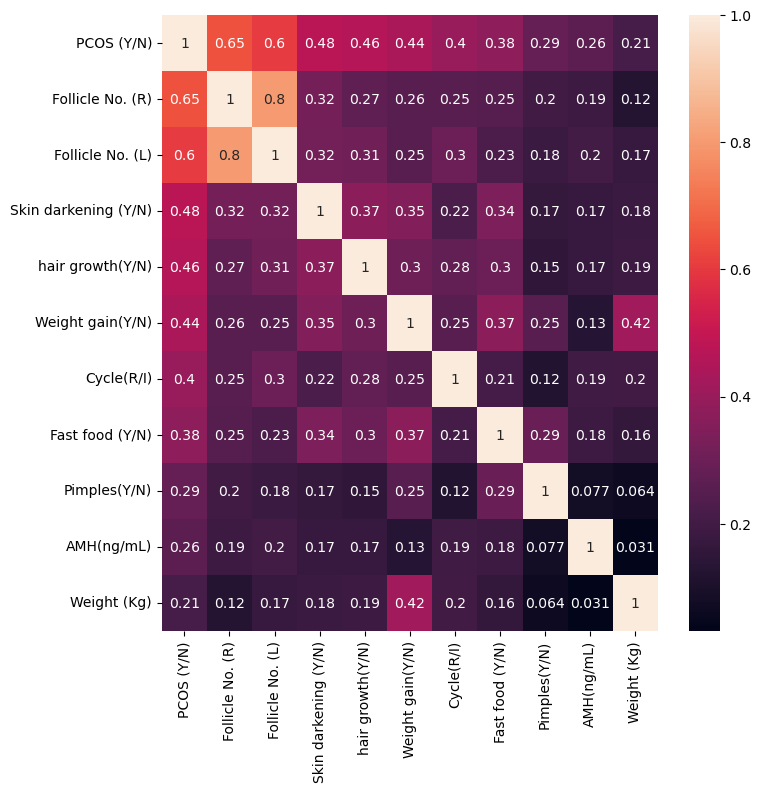

In [65]:
plt.figure(figsize=(8,8))
sns.heatmap(df_new.corr(),annot=True)
plt.show()

In [67]:
df_new['PCOS (Y/N)'].value_counts()

PCOS (Y/N)
0    364
1    177
Name: count, dtype: int64

In [69]:
df_new.dropna(inplace=True)

C:\Users\gungu\AppData\Local\Temp\ipykernel_4544\420984286.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.dropna(inplace=True)


In [71]:
df_new.isnull().sum()

PCOS (Y/N)              0
Follicle No. (R)        0
Follicle No. (L)        0
Skin darkening (Y/N)    0
hair growth(Y/N)        0
Weight gain(Y/N)        0
Cycle(R/I)              0
Fast food (Y/N)         0
Pimples(Y/N)            0
AMH(ng/mL)              0
Weight (Kg)             0
dtype: int64

In [73]:
#PCOS Detection using Builtin Logistic regression

In [75]:
X = df_new.drop(['PCOS (Y/N)'],axis=1)
y = df_new['PCOS (Y/N)']

In [77]:
x_train, x_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [79]:
x_train

,Follicle No. (R),Follicle No. (L),Skin darkening (Y/N),hair growth(Y/N),Weight gain(Y/N),Cycle(R/I),Fast food (Y/N),Pimples(Y/N),AMH(ng/mL),Weight (Kg)
463,1,2,1,1,0,2,1.0,1,10.00,45.0
232,14,16,1,1,0,4,1.0,1,13.60,55.0
448,7,9,1,1,1,4,1.0,0,9.10,71.5
451,18,5,0,0,0,2,0.0,0,0.98,44.0
450,16,20,0,1,1,2,1.0,1,0.91,69.0
...,...,...,...,...,...,...,...,...,...,...
71,6,5,0,0,0,2,0.0,0,2.58,61.0
106,4,6,1,1,1,4,0.0,1,3.90,60.0
271,3,2,0,0,0,2,0.0,1,3.20,55.7
437,12,9,1,0,1,4,1.0,1,8.00,71.0


In [81]:
logreg = LogisticRegression()

In [83]:
logreg.fit(x_train,y_train)

C:\Users\gungu\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [85]:
y_pred = logreg.predict(x_test)

In [87]:
accuracy = accuracy_score(y_test,y_pred)
conf_matrix = confusion_matrix(y_test,y_pred)
classification_rep = classification_report(y_test, y_pred)

In [89]:
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.8888888888888888
Confusion Matrix:
[[74  5]
 [ 7 22]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.93        79
           1       0.81      0.76      0.79        29

    accuracy                           0.89       108
   macro avg       0.86      0.85      0.86       108
weighted avg       0.89      0.89      0.89       108



In [91]:
#Conclusion for Logistic Regression :

#The model performs well for class 0 (the negative class) with high precision (91%), recall (94%), and F1-score (92%). The model performs reasonably well for class 1 (the positive class) with a decent precision (81%) and F1-score (79%), but the recall (76%) is slightly lower, indicating that some positive samples are being misclassified as negative.

In [3]:
import zipfile

zip_path = r"C:\Users\gungu\Downloads\archive (2).zip"  # raw string
extract_path = r"C:\Users\gungu\Downloads\pcos_dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extracted to:", extract_path)


Extracted to: C:\Users\gungu\Downloads\pcos_dataset


In [1]:
import tensorflow as tf
print(tf.__version__)


2.19.0


In [10]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam


In [46]:
import zipfile

zip_path = r"C:\Users\gungu\Downloads\archive (2).zip"
extract_path = r"C:\Users\gungu\Downloads\archive (2)"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Dataset extracted to:", extract_path)


Dataset extracted to: C:\Users\gungu\Downloads\archive (2)


In [2]:
!pip install matplotlib


In [3]:
import os
from PIL import Image

def remove_corrupted_images(folder):
    for category in os.listdir(folder):
        category_path = os.path.join(folder, category)
        if os.path.isdir(category_path):
            for fname in os.listdir(category_path):
                fpath = os.path.join(category_path, fname)
                try:
                    img = Image.open(fpath)
                    img.verify()  # Verify the image is not corrupted
                except Exception as e:
                    print(f"Deleting corrupted file: {fpath}")
                    os.remove(fpath)

remove_corrupted_images(r"C:\Users\gungu\Downloads\archive (2)\data\train")
remove_corrupted_images(r"C:\Users\gungu\Downloads\archive (2)\data\test")


In [45]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Step 1: Set paths
train_dir = r"C:\Users\gungu\Downloads\archive (2)\data\train"
val_dir = r"C:\Users\gungu\Downloads\archive (2)\data\test"


# Step 2: Parameters
img_height, img_width = 128, 128
batch_size = 32



In [20]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels="inferred",
    label_mode="binary",
    #class_names=None,
    shuffle=True,
    seed=12,
    validation_split= 0.15,
    subset="training",
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 1924 files belonging to 2 classes.
Using 1636 files for training.


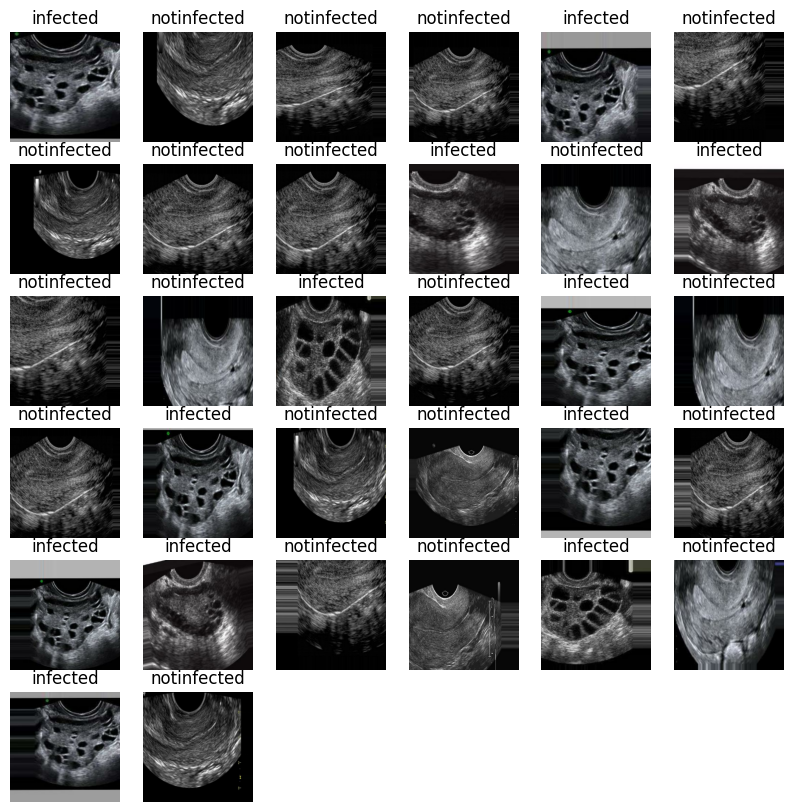

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
class_names = train_ds.class_names
for images, labels in train_ds.take(2):
    for i in range(32):
        ax = plt.subplot(6, 6, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[int(labels[i])])
        plt.axis("off")

In [3]:
# The desired result was not achieved
"""
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels="inferred",
    label_mode="binary",
    #class_names=None,
    shuffle=True,
    seed=12,
    validation_split= 0.15,
    subset="training",
    image_size=(img_height, img_width),
    batch_size=batch_size)


val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    val_dir,
    validation_split= 0.15,
    seed=12,
    subset="validation",
    image_size=(img_height, img_width),
    #label_mode="binary",
    batch_size=batch_size)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test,
    seed=12,
    image_size=(img_height, img_width),
    batch_size=batch_size)
"""



'\ntrain_ds = tf.keras.preprocessing.image_dataset_from_directory(\n    train_dir,\n    labels="inferred",\n    label_mode="binary",\n    #class_names=None,\n    shuffle=True,\n    seed=12,\n    validation_split= 0.15,\n    subset="training",\n    image_size=(img_height, img_width),\n    batch_size=batch_size)\n\n\nval_ds = tf.keras.preprocessing.image_dataset_from_directory(\n    val_dir,\n    validation_split= 0.15,\n    seed=12,\n    subset="validation",\n    image_size=(img_height, img_width),\n    #label_mode="binary",\n    batch_size=batch_size)\n\ntest_ds = tf.keras.preprocessing.image_dataset_from_directory(\n    test,\n    seed=12,\n    image_size=(img_height, img_width),\n    batch_size=batch_size)\n'

In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Set paths to your train and validation folders
train_dir = r"C:\Users\gungu\Downloads\archive (2)\data\train"
val_dir = r"C:\Users\gungu\Downloads\archive (2)\data\test"

# Parameters
img_height, img_width = 224, 224
batch_size = 32

# Data augmentation and rescaling
datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=20,
    validation_split=0.2,  # Important for splitting train/val from train_dir
    fill_mode='nearest'
)

# Train dataset from train_dir with subset
train_ds = datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    classes=['infected', 'notinfected'],  # Make sure these subfolders exist
    subset='training',
    seed=12
)

# Validation dataset from train_dir with subset
val_ds = datagen.flow_from_directory(
    train_dir,  # Note: using same directory with validation_split
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    classes=['infected', 'notinfected'],
    subset='validation',
    seed=12
)


Found 1540 images belonging to 2 classes.
Found 384 images belonging to 2 classes.


In [9]:
# Define the test directory path
test_dir = r"C:\Users\gungu\Downloads\archive (2)\data\test"

# Load the test dataset
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    seed=12,
    image_size=(img_height, img_width),
    batch_size=batch_size
)


Found 1922 files belonging to 2 classes.


In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

# Define the model
model = Sequential()

model.add(Conv2D(12, (5, 5), padding='SAME', activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(8, (5, 5), padding='SAME', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(4, (5, 5), padding='SAME', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(2, activation='softmax'))  # for categorical classification

# Compile the model
opt = Adam(learning_rate=0.01)
model.compile(optimizer=opt, loss=BinaryCrossentropy(), metrics=['accuracy'])


C:\Users\gungu\anaconda3\envs\tf_env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
from tensorflow.keras.callbacks import EarlyStopping

earlyStopping = EarlyStopping(
    monitor="val_loss", 
    mode="min", 
    verbose=1, 
    patience=15, 
    restore_best_weights=True
)


In [19]:
history = model.fit( 
    train_ds,
    validation_data=val_ds,
    callbacks=[earlyStopping],
    batch_size=batch_size,
    verbose=1,
    epochs=20)

C:\Users\gungu\anaconda3\envs\tf_env\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.6967 - loss: 0.5266 - val_accuracy: 0.9844 - val_loss: 0.0613
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 45s 919ms/step - accuracy: 0.9663 - loss: 0.0833 - val_accuracy: 0.9948 - val_loss: 0.0118
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 44s 908ms/step - accuracy: 0.9933 - loss: 0.0204 - val_accuracy: 0.9844 - val_loss: 0.0422
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 45s 910ms/step - accuracy: 0.9919 - loss: 0.0264 - val_accuracy: 0.9974 - val_loss: 0.0061
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 44s 900ms/step - accuracy: 0.9963 - loss: 0.0141 - val_accuracy: 0.9948 - val_loss: 0.0131
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 44s 903ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 1.0000 - val_loss: 0.0015
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 44s 904ms/step - accuracy: 0.9981 - loss: 0.0052 - val_accuracy: 1.0000 - val_loss: 0.0027
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 86s 2s/step - accuracy: 0.9821 - loss: 0.0652 - val_accuracy: 

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 12)   │           912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 12)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 8)    │         2,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 4)      │           804 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 4)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │         6,274 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,196 (121.86 KB)

 Trainable params: 10,398 (40.62 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 20,798 (81.25 KB)

In [25]:
!pip install matplotlib

In [27]:
import matplotlib.pyplot as plt


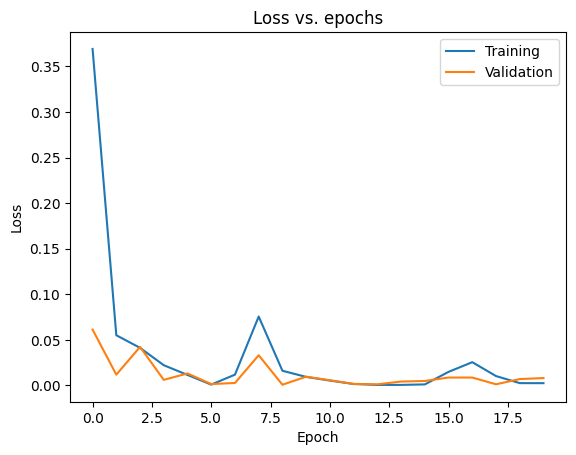

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

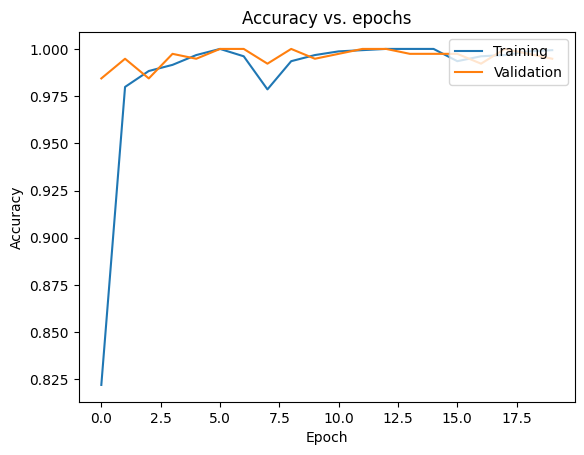

In [31]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [33]:
model.evaluate(val_ds)

12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 696ms/step - accuracy: 1.0000 - loss: 0.0013


[0.0010829709935933352, 1.0]

In [35]:
model.save('model.h5')